#ModelB-Batik

Using device: cuda


Epoch 1/50: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]


Epoch 1: Train Loss=1.6421, Val Loss=3.8940, Train Acc=52.10%, Val Acc=25.93%


Epoch 2/50: 100%|██████████| 26/26 [00:10<00:00,  2.52it/s]


Epoch 2: Train Loss=1.3062, Val Loss=1.8544, Train Acc=54.07%, Val Acc=54.44%


Epoch 3/50: 100%|██████████| 26/26 [00:09<00:00,  2.62it/s]


Epoch 3: Train Loss=1.0370, Val Loss=1.1115, Train Acc=61.11%, Val Acc=61.11%


Epoch 4/50: 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]


Epoch 4: Train Loss=1.0751, Val Loss=0.6692, Train Acc=61.73%, Val Acc=79.63%


Epoch 5/50: 100%|██████████| 26/26 [00:09<00:00,  2.70it/s]


Epoch 5: Train Loss=0.7782, Val Loss=1.4299, Train Acc=73.58%, Val Acc=74.44%


Epoch 6/50: 100%|██████████| 26/26 [00:09<00:00,  2.64it/s]


Epoch 6: Train Loss=0.6840, Val Loss=0.4075, Train Acc=76.67%, Val Acc=86.67%


Epoch 7/50: 100%|██████████| 26/26 [00:09<00:00,  2.61it/s]


Epoch 7: Train Loss=0.6979, Val Loss=0.3571, Train Acc=76.42%, Val Acc=87.78%


Epoch 8/50: 100%|██████████| 26/26 [00:10<00:00,  2.58it/s]


Epoch 8: Train Loss=0.4135, Val Loss=0.2184, Train Acc=86.42%, Val Acc=93.33%


Epoch 9/50: 100%|██████████| 26/26 [00:09<00:00,  2.63it/s]


Epoch 9: Train Loss=0.4085, Val Loss=0.2640, Train Acc=85.93%, Val Acc=90.37%


Epoch 10/50: 100%|██████████| 26/26 [00:09<00:00,  2.67it/s]


Epoch 10: Train Loss=0.3512, Val Loss=0.1383, Train Acc=88.52%, Val Acc=94.44%


Epoch 11/50: 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]


Epoch 11: Train Loss=0.4534, Val Loss=0.3178, Train Acc=85.43%, Val Acc=89.26%


Epoch 12/50: 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]


Epoch 12: Train Loss=0.2909, Val Loss=0.1044, Train Acc=89.38%, Val Acc=97.78%


Epoch 13/50: 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]


Epoch 13: Train Loss=0.1719, Val Loss=0.0532, Train Acc=95.31%, Val Acc=98.15%


Epoch 14/50: 100%|██████████| 26/26 [00:10<00:00,  2.56it/s]


Epoch 14: Train Loss=0.2357, Val Loss=0.2239, Train Acc=92.10%, Val Acc=95.19%


Epoch 15/50: 100%|██████████| 26/26 [00:10<00:00,  2.56it/s]


Epoch 15: Train Loss=0.2103, Val Loss=0.1014, Train Acc=93.33%, Val Acc=96.30%


Epoch 16/50: 100%|██████████| 26/26 [00:10<00:00,  2.50it/s]


Epoch 16: Train Loss=0.1611, Val Loss=0.0705, Train Acc=94.20%, Val Acc=97.41%


Epoch 17/50: 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]


Epoch 17: Train Loss=0.2225, Val Loss=0.1848, Train Acc=92.47%, Val Acc=94.81%


Epoch 18/50: 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


Epoch 18: Train Loss=0.2389, Val Loss=0.4253, Train Acc=93.46%, Val Acc=88.52%
Early stopping triggered.
Model saved as modelB_best.pth
Final Test Accuracy: 98.15%


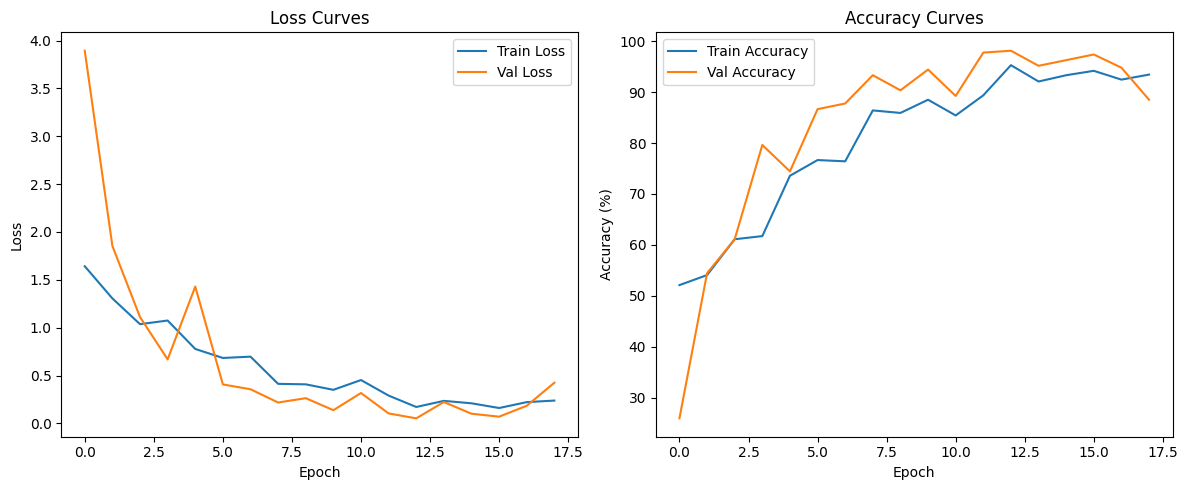

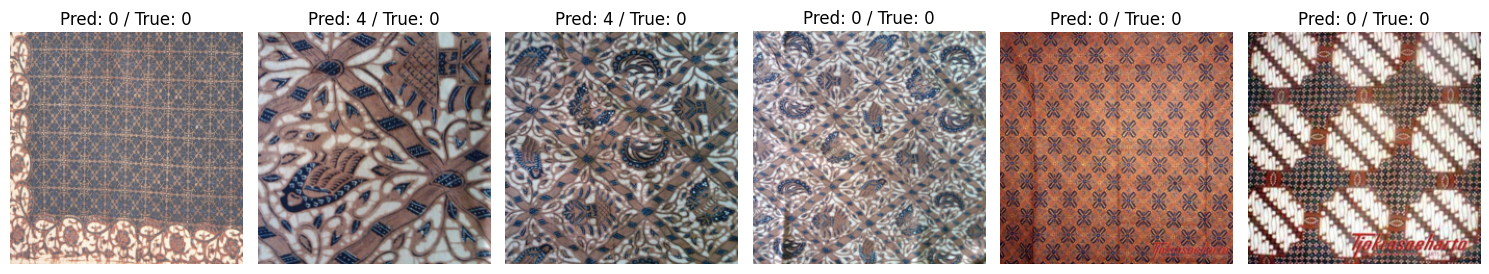

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from copy import deepcopy

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Parameters
batch_size = 32
num_epochs = 50
learning_rate = 0.001
patience = 5  # Early stopping patience

train_dir = "/content/drive/MyDrive/kuliah (1)/sem6/analisis citra/resnet50-batik/processed_dataset"
test_dir = "/content/drive/MyDrive/kuliah (1)/sem6/analisis citra/resnet50-batik/test_data"

# Transforms
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Datasets and loaders
train_dataset = datasets.ImageFolder(root=train_dir, transform=resize_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=resize_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Load pretrained ResNet50
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 6)  # 6 Batik classes
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# Tracking
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
best_val_loss = float('inf')
epochs_no_improve = 0

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break

# Load best model
model.load_state_dict(best_model_state)
torch.save(model.state_dict(), "modelB_best.pth")
print("Model saved as modelB_best.pth")

# Test accuracy
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Final Test Accuracy: {100 * correct / total:.2f}%")

# Plot training curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

# Optional: visualize predictions
def visualize_predictions(loader, n=6):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    images = images.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(15, 4))
    for i in range(n):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(f"Pred: {preds[i].item()} / True: {labels[i].item()}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call to visualize
visualize_predictions(test_loader)


#ModelA-Batik

Using device: cuda


Epoch 1/50: 100%|██████████| 34/34 [00:13<00:00,  2.60it/s]


Epoch 1: Train Loss=1.3522, Val Loss=27.0837, Train Acc=56.20%, Val Acc=40.00%


Epoch 2/50: 100%|██████████| 34/34 [00:11<00:00,  2.87it/s]


Epoch 2: Train Loss=0.9353, Val Loss=0.8675, Train Acc=70.56%, Val Acc=70.37%


Epoch 3/50: 100%|██████████| 34/34 [00:12<00:00,  2.82it/s]


Epoch 3: Train Loss=0.7038, Val Loss=0.8527, Train Acc=76.48%, Val Acc=73.70%


Epoch 4/50: 100%|██████████| 34/34 [00:12<00:00,  2.72it/s]


Epoch 4: Train Loss=0.5385, Val Loss=0.4604, Train Acc=84.26%, Val Acc=87.78%


Epoch 5/50: 100%|██████████| 34/34 [00:12<00:00,  2.73it/s]


Epoch 5: Train Loss=0.4217, Val Loss=0.6713, Train Acc=87.13%, Val Acc=85.93%


Epoch 6/50: 100%|██████████| 34/34 [00:12<00:00,  2.70it/s]


Epoch 6: Train Loss=0.3465, Val Loss=0.4362, Train Acc=89.35%, Val Acc=89.63%


Epoch 7/50: 100%|██████████| 34/34 [00:12<00:00,  2.67it/s]


Epoch 7: Train Loss=0.3468, Val Loss=0.3991, Train Acc=88.70%, Val Acc=86.67%


Epoch 8/50: 100%|██████████| 34/34 [00:13<00:00,  2.58it/s]


Epoch 8: Train Loss=0.3138, Val Loss=0.3078, Train Acc=90.00%, Val Acc=91.11%


Epoch 9/50: 100%|██████████| 34/34 [00:13<00:00,  2.62it/s]


Epoch 9: Train Loss=0.2622, Val Loss=0.3767, Train Acc=91.48%, Val Acc=89.63%


Epoch 10/50: 100%|██████████| 34/34 [00:13<00:00,  2.57it/s]


Epoch 10: Train Loss=0.5451, Val Loss=0.9827, Train Acc=81.48%, Val Acc=74.07%


Epoch 11/50: 100%|██████████| 34/34 [00:12<00:00,  2.72it/s]


Epoch 11: Train Loss=0.3547, Val Loss=0.5241, Train Acc=87.87%, Val Acc=81.11%


Epoch 12/50: 100%|██████████| 34/34 [00:11<00:00,  2.90it/s]


Epoch 12: Train Loss=0.2619, Val Loss=0.3418, Train Acc=91.20%, Val Acc=89.63%


Epoch 13/50: 100%|██████████| 34/34 [00:11<00:00,  2.96it/s]


Epoch 13: Train Loss=0.1916, Val Loss=0.2007, Train Acc=93.70%, Val Acc=94.07%


Epoch 14/50: 100%|██████████| 34/34 [00:11<00:00,  2.92it/s]


Epoch 14: Train Loss=0.1375, Val Loss=0.2324, Train Acc=95.46%, Val Acc=94.44%


Epoch 15/50: 100%|██████████| 34/34 [00:11<00:00,  2.86it/s]


Epoch 15: Train Loss=0.1169, Val Loss=0.1761, Train Acc=96.85%, Val Acc=95.93%


Epoch 16/50: 100%|██████████| 34/34 [00:12<00:00,  2.83it/s]


Epoch 16: Train Loss=0.0868, Val Loss=0.1799, Train Acc=97.69%, Val Acc=95.93%


Epoch 17/50: 100%|██████████| 34/34 [00:12<00:00,  2.78it/s]


Epoch 17: Train Loss=0.0972, Val Loss=0.1506, Train Acc=96.67%, Val Acc=95.93%


Epoch 18/50: 100%|██████████| 34/34 [00:12<00:00,  2.81it/s]


Epoch 18: Train Loss=0.1380, Val Loss=0.3168, Train Acc=95.00%, Val Acc=88.52%


Epoch 19/50: 100%|██████████| 34/34 [00:13<00:00,  2.60it/s]


Epoch 19: Train Loss=0.1608, Val Loss=0.3524, Train Acc=94.17%, Val Acc=91.48%


Epoch 20/50: 100%|██████████| 34/34 [00:12<00:00,  2.69it/s]


Epoch 20: Train Loss=0.2673, Val Loss=0.5925, Train Acc=91.30%, Val Acc=85.93%


Epoch 21/50: 100%|██████████| 34/34 [00:13<00:00,  2.54it/s]


Epoch 21: Train Loss=0.2624, Val Loss=0.2921, Train Acc=91.94%, Val Acc=90.00%


Epoch 22/50: 100%|██████████| 34/34 [00:13<00:00,  2.59it/s]


Epoch 22: Train Loss=0.1266, Val Loss=0.2046, Train Acc=95.56%, Val Acc=95.19%
Early stopping triggered.
Model saved as modelB_best.pth
Final Test Accuracy: 95.93%


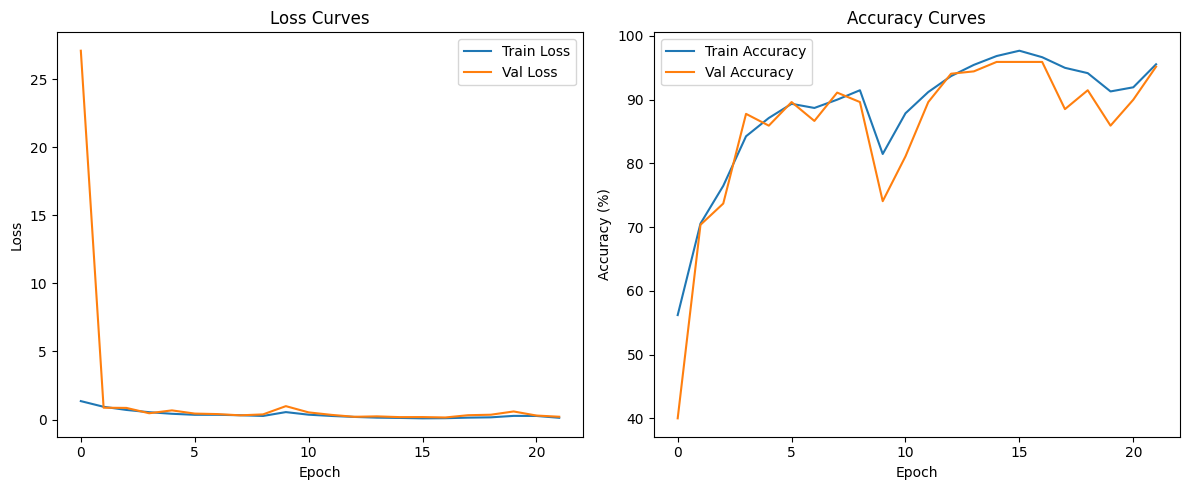

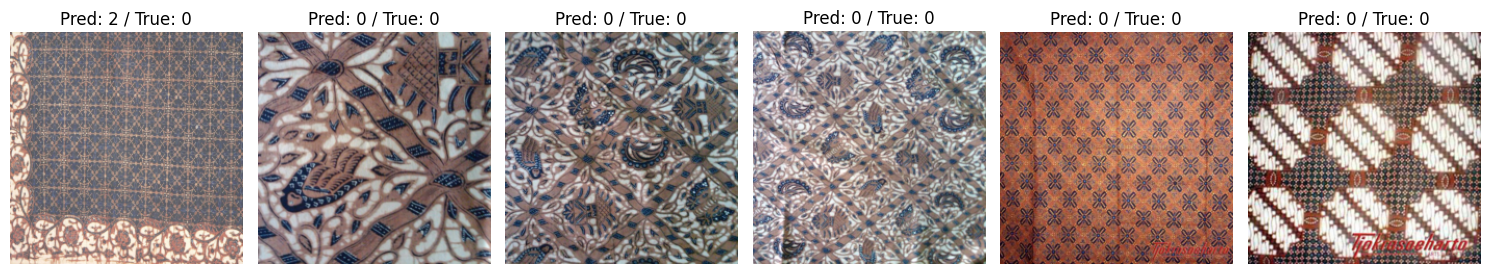

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from copy import deepcopy

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Parameters
batch_size = 32
num_epochs = 50
learning_rate = 0.001
patience = 5  # Early stopping patience

train_dir = "/content/drive/MyDrive/kuliah (1)/sem6/analisis citra/resnet50-batik/dataset_split/train"
test_dir = "/content/drive/MyDrive/kuliah (1)/sem6/analisis citra/resnet50-batik/test_data"

# Transforms
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Datasets and loaders
train_dataset = datasets.ImageFolder(root=train_dir, transform=resize_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=resize_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Load pretrained ResNet50
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 6)  # 6 Batik classes
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# Tracking
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
best_val_loss = float('inf')
epochs_no_improve = 0

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break

# Load best model
model.load_state_dict(best_model_state)
torch.save(model.state_dict(), "modelA_best.pth")
print("Model saved as modelA_best.pth")

# Test accuracy
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Final Test Accuracy: {100 * correct / total:.2f}%")

# Plot training curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

# Optional: visualize predictions
def visualize_predictions(loader, n=6):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    images = images.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(15, 4))
    for i in range(n):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(f"Pred: {preds[i].item()} / True: {labels[i].item()}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call to visualize
visualize_predictions(test_loader)
